In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

In [5]:
#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=110)

#붓꽃 데이터 로딩 -> 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)



잠깐 데이터좀 보자

In [7]:
type(iris_data)

sklearn.utils.Bunch

In [14]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


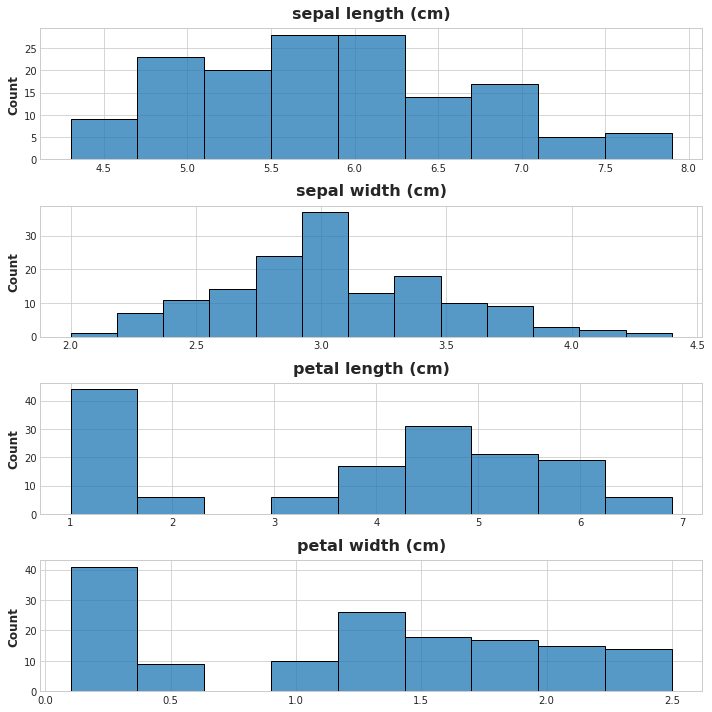

In [27]:

fig, axes =  plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

for i in range(4):
    sns.histplot(data=iris_data.data[:,i], ax=axes[i])
    axes[i].set_title(iris_data.feature_names[i])

In [8]:
# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=110)

In [11]:
from sklearn.tree import export_graphviz

# tree.dot 파일 생성!
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

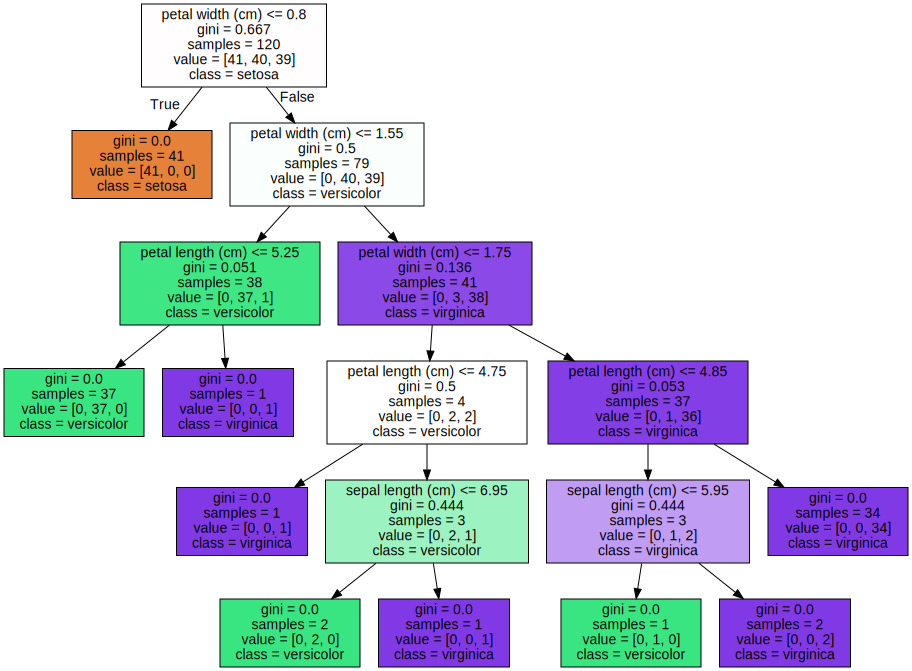

In [12]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [37]:
import numpy as np
%matplotlib inline

# feature importance
print(f"Feature importances: {np.round(dt_clf.feature_importances_,3)} \n")

# feature 별 importance 매핑
for i in range(4):
    print(f"{iris_data.feature_names[i]}:{np.round(dt_clf.feature_importances_[i],3)}\n")

Feature importances: [0.033 0.    0.04  0.926] 

sepal length (cm):0.033

sepal width (cm):0.0

petal length (cm):0.04

petal width (cm):0.926



## 결정트리 실습
- UCI 데이터: 사용자 행동 인식 데이터 세트

In [81]:
! pwd

/data/git


In [111]:
feature_name_df = pd.read_csv('./ML/data/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

In [93]:
feature_name_df

# feature_name_df = pd.read_csv('./ML/data/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'],index_col=0)
# index_col 지정 안 했을 경우 위와 같은 결과
# feature_name_df.set_index(keys=['column_index'], drop=True)

,column_name
column_index,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"


In [108]:
feature_name_df.drop_duplicates()

,column_name
column_index,
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"


In [126]:
feature_names = feature_name_df.set_index(keys=['column_index','column_name'], drop=True).index.to_list()

In [132]:
pd.read_csv('./ML/data/UCI HAR Dataset/train/X_train.txt', sep='\s+', names = feature_names, header=None)

,1,2,3,4,5,6,7,8,9,10,...,552,553,554,555,556,557,558,559,560,561
,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [135]:
def get_human_dataset():
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv 에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./ML/data/UCI HAR Dataset/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    feature_names = feature_name_df.set_index(keys=['column_index','column_name'], drop=True).index.to_list()
    
    # 학습  레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용    
    X_train = pd.read_csv('./ML/data/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_names)
    X_test = pd.read_csv('./ML/data/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_names)

    y_train = pd.read_csv('./ML/data/UCI HAR Dataset/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('./ML/data/UCI HAR Dataset/test/y_test.txt', sep='\s+', names=['action'])

    # 로드된 학습/테스트용 Dataframe을 모두 반화
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, (1, 'tBodyAcc-mean()-X') to (561, 'angle(Z,gravityMean)')
dtypes: float64(561)
memory usage: 31.5 MB


In [137]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


<AxesSubplot:xlabel='action', ylabel='Count'>

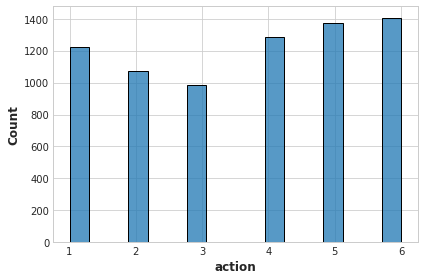

In [140]:
sns.histplot(data=y_train, x='action')

In [148]:
y_test

,action
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pprint import pprint

dt_clf = DecisionTreeClassifier(random_state=1156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('정확도: {0:.4f}'.format(accuracy))

# 트리 하이퍼파라미터 추출
print(f'DecisionTreeClassifier 기본 하이퍼 파라미터: \n')
pprint(dt_clf.get_params())

정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1156,
 'splitter': 'best'}


In [152]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8,10,12,16,20,24] }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8534
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10}


In [155]:
cv_rst_df = pd.DataFrame(grid_cv.cv_results_)
cv_rst_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.346237,0.011263,0.003746,0.000043,6,{'max_depth': 6},0.815092,0.866757,0.824490,0.870748,0.870748,0.849567,0.024537,3
1,1.682824,0.029610,0.003773,0.000071,8,{'max_depth': 8},0.821890,0.825289,0.848980,0.874150,0.890476,0.852157,0.026833,2
2,1.973974,0.054578,0.003731,0.000008,10,{'max_depth': 10},0.818491,0.810333,0.848980,0.889116,0.900000,0.853384,0.036167,1
3,2.211913,0.108879,0.003779,0.000057,12,{'max_depth': 12},0.798776,0.817131,0.853741,0.886395,0.883673,0.847943,0.035087,4
4,2.464644,0.184419,0.003798,0.000083,16,{'max_depth': 16},0.802855,0.806934,0.853741,0.880952,0.887755,0.846448,0.035810,6
5,2.497885,0.227076,0.003743,0.000010,20,{'max_depth': 20},0.798097,0.806934,0.853741,0.887075,0.887075,0.846584,0.038088,5
6,2.498496,0.230549,0.003746,0.000011,24,{'max_depth': 24},0.794697,0.806934,0.853741,0.887075,0.887075,0.845905,0.038967,7


depth가 10일 때 제일 accuracy score가 높다.

In [160]:
cv_rst_df[['param_max_depth', 'mean_test_score','rank_test_score']].sort_values(by=['mean_test_score'], ascending=False)

,param_max_depth,mean_test_score,rank_test_score
2,10,0.853384,1
1,8,0.852157,2
0,6,0.849567,3
3,12,0.847943,4
5,20,0.846584,5
4,16,0.846448,6
6,24,0.845905,7


test 셋으로 max_depth 바꿔가며 정확도 확인

In [163]:
max_depths = [6,7,10,12,14,20,24]
for d in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=d, random_state=20)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    acc  = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(d, acc))
    

max_depth = 6 정확도: 0.8524
max_depth = 7 정확도: 0.8622
max_depth = 10 정확도: 0.8704
max_depth = 12 정확도: 0.8639
max_depth = 14 정확도: 0.8585
max_depth = 20 정확도: 0.8504
max_depth = 24 정확도: 0.8504


In [165]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [6,8,10,12,16,20,24], 'min_samples_split':[16,24] }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))

print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 최고 평균 정확도 수치: 0.8579
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [167]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
acc = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(acc))

결정 트리 예측 정확도: 0.8734


feature importance 확인하기!

In [168]:
ftr_importances_  = best_df_clf.feature_importances_

In [171]:
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 series 변환
ftr_importances_ .shape

(561,)

분류에 영향을 미친 feature 랭킬 20

Text(0.5, 1.0, 'Feature importance Top 20')

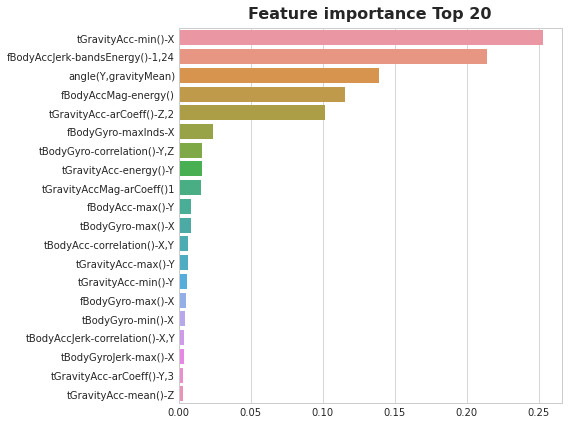

In [180]:
ftr_importances_ = pd.Series(ftr_importances_, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances_.sort_values(ascending=False)[:20]
ftr_top20 = ftr_top20.droplevel(0)
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.title('Feature importance Top 20')


In [177]:
ftr_top20.droplevel(0)

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,24    0.214038
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101548
fBodyGyro-maxInds-X                0.023971
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAcc-energy()-Y             0.016433
tGravityAccMag-arCoeff()1          0.015741
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tBodyAcc-correlation()-X,Y         0.006710
tGravityAcc-max()-Y                0.006290
tGravityAcc-min()-Y                0.006114
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
tGravityAcc-mean()-Z               0.002987
dtype: float64

# sklearn으로 classification 테스트용 데이터셋 만들기

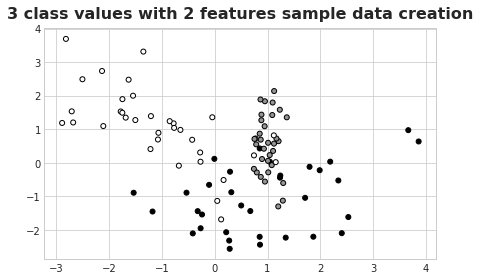

In [41]:
from sklearn.datasets import make_classification
%matplotlib inline

plt.title("3 class values with 2 features sample data creation")

X_features, y_labels = make_classification(n_features=2, 
                                           n_redundant=0, 
                                           n_informative=2, 
                                           n_classes=3, 
                                           n_clusters_per_class=1, 
                                           random_state=0)

plt.scatter(X_features[:,0],X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

In [42]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)


# 보팅 분류기(Voting Classifier)
- 여러 가지 분류기 이용
  - 로지스틱 회귀
  - KNN

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [75]:
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [76]:
# 개별 모델  만들기 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474


In [78]:
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for clf in classifiers:
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    class_name = clf.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 잠깐만..MI information 얻는 샘플

In [50]:
plt.style.use("seaborn-whitegrid")

df = pd.read_csv("./kaggle-fe-course-data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [54]:
# 다 스트링 타입인듯?
# 변경 전
df[['make','fuel_type','aspiration','drive_wheels', 'engine_location', 'engine_type','fuel_system']]

,make,fuel_type,aspiration,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,gas,std,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,rwd,front,ohcv,mpfi
3,audi,gas,std,fwd,front,ohc,mpfi
4,audi,gas,std,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...
188,volvo,gas,std,rwd,front,ohc,mpfi
189,volvo,gas,turbo,rwd,front,ohc,mpfi
190,volvo,gas,std,rwd,front,ohcv,mpfi
191,volvo,diesel,turbo,rwd,front,ohc,idi


df 타입이 object, int, float으로 구성되어 있어서 object만 int타입으로 바꿔주면.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [64]:
df[['make']].drop_duplicates()

,make
0,alfa-romero
3,audi
9,bmw
17,chevrolet
20,dodge
28,honda
41,isuzu
43,jaguar
46,mazda
58,mercedes-benz


In [55]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    print(colname)
    X[colname], _ = X[colname].factorize()
    #printX[colname]

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

make
fuel_type
aspiration
body_style
drive_wheels
engine_location
engine_type
fuel_system


In [56]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [58]:
# 다 스트링 타입인듯?
# 변경 전
X[['make','fuel_type','aspiration','drive_wheels', 'engine_location', 'engine_type','fuel_system']]

,make,fuel_type,aspiration,drive_wheels,engine_location,engine_type,fuel_system
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,1,0,0,1,0,2,0
4,1,0,0,2,0,2,0
...,...,...,...,...,...,...,...
188,20,0,0,0,0,2,0
189,20,0,1,0,0,2,0
190,20,0,0,0,0,1,0
191,20,1,1,0,0,2,5


In [65]:
X[['make']].drop_duplicates()

,make
0,0
3,1
9,2
17,3
20,4
28,5
41,6
43,7
46,8
58,9


In [67]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.475049
highway_mpg          0.952796
length               0.606939
bore                 0.500624
stroke               0.368351
num_of_cylinders     0.331844
compression_ratio    0.132093
fuel_type            0.048120
Name: MI Scores, dtype: float64

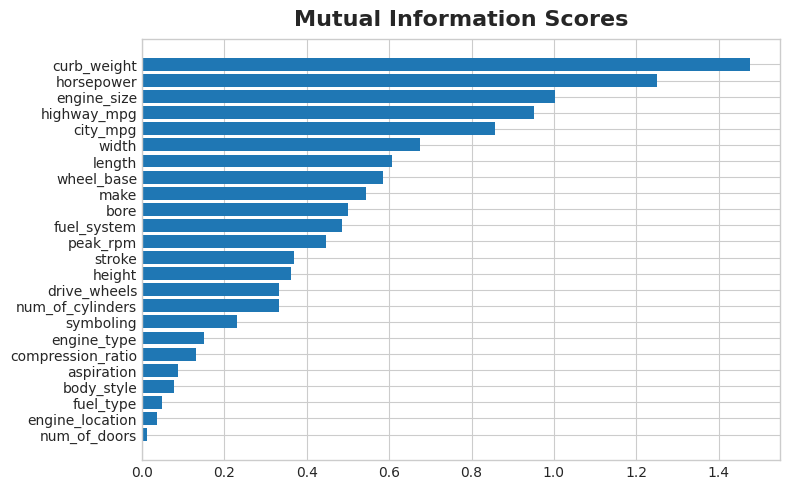

In [68]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

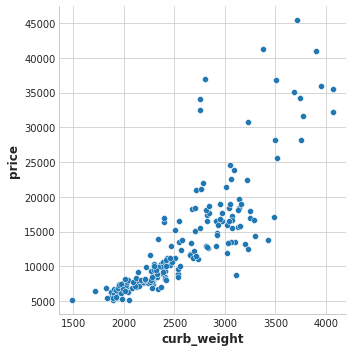

In [69]:
sns.relplot(x="curb_weight", y="price", data=df);

In [183]:
df[["horsepower","price","fuel_type"]]

,horsepower,price,fuel_type
0,111,13495,gas
1,111,16500,gas
2,154,16500,gas
3,102,13950,gas
4,115,17450,gas
...,...,...,...
188,114,16845,gas
189,160,19045,gas
190,134,21485,gas
191,106,22470,diesel


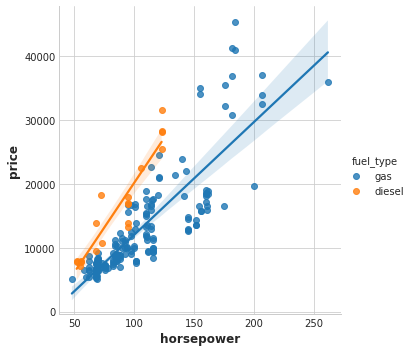

In [70]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

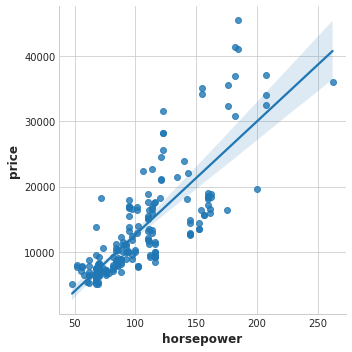

In [71]:
sns.lmplot(x="horsepower", y="price", data=df);

In [186]:
# 220114
#!pip install lightgbm
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 199 kB 5.0 MB/s            
     |████████████████████████████████| 26.7 MB 8.4 MB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.


In [191]:
!pip install --upgrade numpy

# 나중에 텐서플로쓸 때 문제되는거 아니냐;
# tensorflow 2.6.0+nv requires numpy~=1.19.2, but you have numpy 1.22.0 which is incompatible.
#! pip list

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.8 MB 8.4 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0+nv requires numpy~=1.19.2, but you have numpy 1.22.0 which is incompatible.


In [188]:
from imblearn.over_sampling import SMOTE
